# 1. Overfitting & Underfitting (ref ChatGPT)
Overfitting และ Underfitting เป็นปัญหาทั่วไปที่เกิดขึ้นในกระบวนการเรียนรู้ของเครื่อง (Machine Learning) โดยเฉพาะในงานที่เกี่ยวข้องกับการถดถอย (Regression) หรือการจำแนก (Classification) ทั้งสองสถานการณ์นี้ส่งผลต่อความสามารถของโมเดลในการทำนายข้อมูลใหม่ได้อย่างถูกต้อง

## 1.1 Overfitting
Overfitting เกิดขึ้นเมื่อโมเดลมีความซับซ้อนเกินไป ทำให้มันเรียนรู้รายละเอียดและ noise ในข้อมูลฝึก (training data) มากเกินไป ซึ่งทำให้โมเดลสามารถทำนายข้อมูลฝึกได้อย่างแม่นยำมาก แต่ไม่สามารถทำนายข้อมูลทดสอบ (test data) หรือข้อมูลใหม่ได้ดี เนื่องจากมันได้เรียนรู้ pattern ที่เฉพาะเจาะจงเกินไปในข้อมูลฝึก ซึ่งไม่เกิดขึ้นจริงในข้อมูลทั่วไป

### สาเหตุของ Overfitting
* โมเดลที่มีพารามิเตอร์มากเกินไป
* ข้อมูลฝึกมี noise หรือความผิดปกติมาก
* ข้อมูลฝึกมีขนาดเล็ก

### สัญญาณของ Overfitting
* คะแนนความแม่นยำ (accuracy) บนข้อมูลฝึกสูงมาก แต่ต่ำมากบนข้อมูลทดสอบ
* ค่า loss บนข้อมูลฝึกต่ำ แต่สูงบนข้อมูลทดสอบ

### การแก้ไข Overfitting
* ลดความซับซ้อนของโมเดล (เช่น ลดจำนวนพารามิเตอร์)
* ใช้เทคนิค regularization เช่น L1 หรือ L2 regularization
* เพิ่มขนาดของข้อมูลฝึก
* ใช้การลดข้อมูลที่ไม่จำเป็น (dimensionality reduction)
* ใช้การทำ cross-validation

## 5.2 Underfitting
Underfitting เกิดขึ้นเมื่อโมเดลไม่สามารถเรียนรู้ pattern ที่สำคัญในข้อมูลฝึกได้ ทำให้มันไม่สามารถทำนายข้อมูลฝึกได้ดี และยิ่งไม่สามารถทำนายข้อมูลทดสอบได้ดี โมเดลที่เกิด Underfitting มักจะเรียบง่ายเกินไปที่จะจับ pattern ที่ซับซ้อนในข้อมูลได้

### สาเหตุของ Underfitting
* โมเดลที่มีความซับซ้อนน้อยเกินไป
* ใช้ฟีเจอร์ที่ไม่เหมาะสมในการฝึกโมเดล
* ข้อมูลฝึกไม่เพียงพอหรือไม่เกี่ยวข้องกับปัญหาที่ต้องการแก้ไข

### สัญญาณของ Underfitting
* คะแนนความแม่นยำ (accuracy) บนทั้งข้อมูลฝึกและข้อมูลทดสอบต่ำ
* ค่า loss สูงทั้งบนข้อมูลฝึกและข้อมูลทดสอบ

### การแก้ไข Underfitting
* เพิ่มความซับซ้อนของโมเดล (เช่น เพิ่มจำนวนพารามิเตอร์)
* เลือกฟีเจอร์ที่มีความสัมพันธ์กับเป้าหมายมากขึ้น
* ใช้ข้อมูลฝึกที่มีคุณภาพและเพียงพอ

# 2. Regression Example

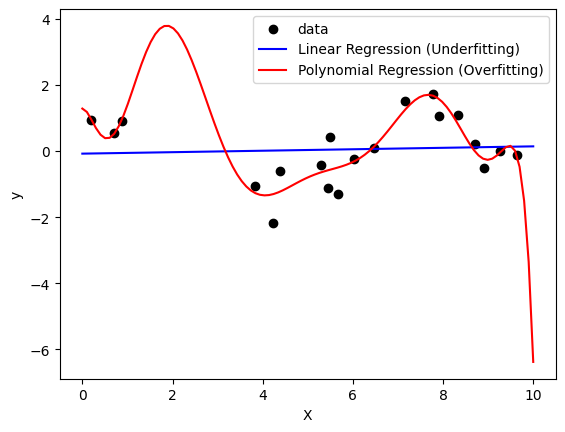

In [12]:
# Create Random Data by numpy
import numpy as np
np.random.seed(0)
X = np.sort(np.random.rand(20, 1) * 10, axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.5, X.shape[0])

# Create for Plotting Data
X_plot = np.linspace(0, 10, 100).reshape(-1, 1)

# Linear Regression (Underfitting)
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X, y)
y_linear_pred = linear.predict(X_plot)

# Polynomial Regression (Overfitting)
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=10)
X_poly = poly_features.fit_transform(X)
X_plot_poly = poly_features.transform(X_plot)
poly = LinearRegression()
poly.fit(X_poly, y)
y_poly_pred = poly.predict(X_plot_poly)

# Plotting
import matplotlib.pyplot as plt
plt.scatter(X, y, color='black', label='data')
plt.plot(X_plot, y_linear_pred, color='blue', label='Linear Regression (Underfitting)')
plt.plot(X_plot, y_poly_pred, color='red', label='Polynomial Regression (Overfitting)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


1. Linear Regression 
    * เป็นตัวอย่างของ Underfitting เนื่องจากมันเป็นโมเดลที่เรียบง่ายเกินไปที่จะจับ pattern ที่ซับซ้อนในข้อมูลได้
    
2. Polynomial Regression (degree = 10) 
    * เป็นตัวอย่างของ Overfitting เนื่องจากมันมีความซับซ้อนเกินไปและเรียนรู้รายละเอียดของข้อมูลฝึกมากเกินไป

# 3. Classification Example

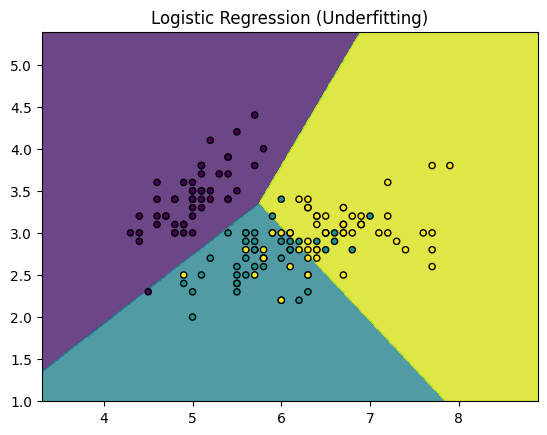

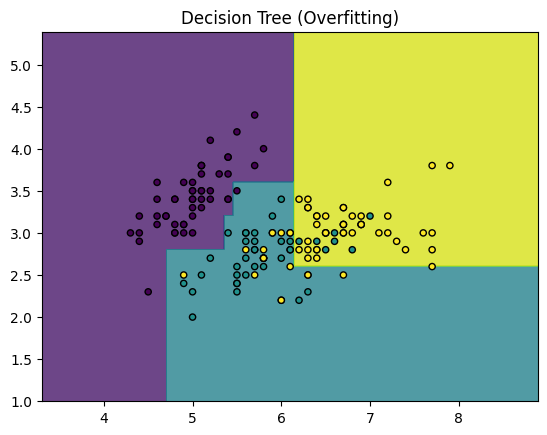

Logistic Regression - Train accuracy: 0.7904761904761904
Logistic Regression - Test accuracy: 0.8222222222222222
Decision Tree - Train accuracy: 0.8380952380952381
Decision Tree - Test accuracy: 0.7555555555555555


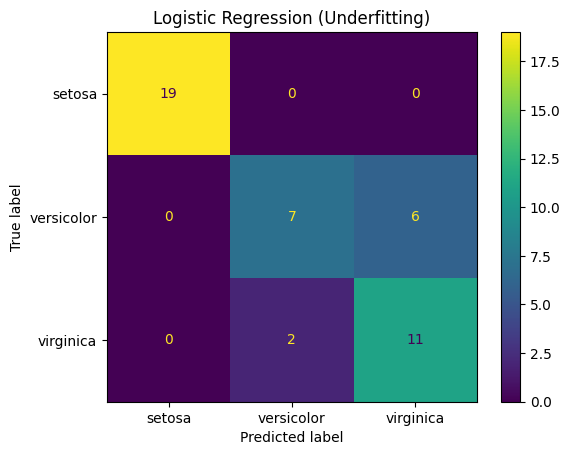

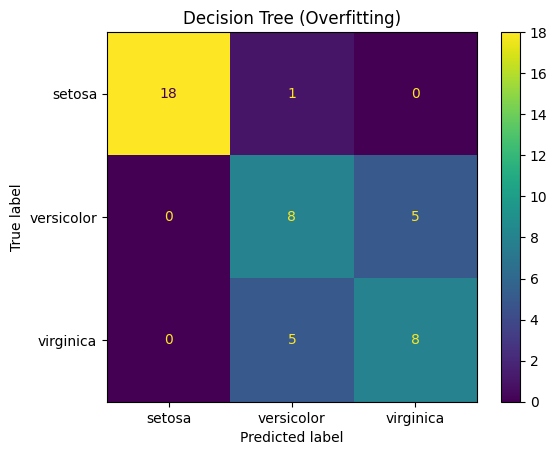

In [14]:
# Iris Data
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, :2] 
y = iris.target

# train & test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression (Underfitting)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_log_reg_pred_train = log_reg.predict(X_train)
y_log_reg_pred_test = log_reg.predict(X_test)

# Decision Tree (Overfitting)
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth = 4, random_state=42)
tree_clf.fit(X_train, y_train)
y_tree_pred_train = tree_clf.predict(X_train)
y_tree_pred_test = tree_clf.predict(X_test)

# Plotting decision boundaries
import numpy as np
import matplotlib.pyplot as plt
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
    plt.title(title)
    plt.show()

# Plot decision boundaries
plot_decision_boundary(log_reg, X, y, "Logistic Regression (Underfitting)")
plot_decision_boundary(tree_clf, X, y, "Decision Tree (Overfitting)")

from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
# Print accuracy scores
print(f"Logistic Regression - Train accuracy: {accuracy_score(y_train, y_log_reg_pred_train)}")
print(f"Logistic Regression - Test accuracy: {accuracy_score(y_test, y_log_reg_pred_test)}")
print(f"Decision Tree - Train accuracy: {accuracy_score(y_train, y_tree_pred_train)}")
print(f"Decision Tree - Test accuracy: {accuracy_score(y_test, y_tree_pred_test)}")

# Plot confusion matrix for Logistic Regression
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, display_labels=iris.target_names)
plt.title("Logistic Regression (Underfitting)")
plt.show()

# Plot confusion matrix for Decision Tree
ConfusionMatrixDisplay.from_estimator(tree_clf, X_test, y_test, display_labels=iris.target_names)
plt.title("Decision Tree (Overfitting)")
plt.show()

1. Logistic Regression
    * เป็นโมเดลที่เรียบง่าย อาจทำให้เกิด Underfitting โดยเฉพาะถ้าข้อมูลมีความซับซ้อนมาก แต่ในกรณีของ Iris dataset Logistic Regression อาจจะไม่เกิด Underfitting มากนัก เนื่องจากข้อมูลไม่ซับซ้อนมาก
2. Decision Tree 
    * ที่ใช้ max_depth = 4 เป็นโมเดลที่ซับซ้อน อาจทำให้เกิด Overfitting โดยโมเดลจะจำรายละเอียดและ noise ในข้อมูลฝึกมากเกินไป

### การแสดงผล
1. การตัดสินใจในพื้นที่ (Decision Boundaries)
    * Logistic Regression จะสร้าง decision boundaries ที่เป็นเส้นตรง ทำให้บางครั้งไม่สามารถแยกข้อมูลที่ซับซ้อนได้ดี ซึ่งแสดงให้เห็นถึง Underfitting
Decision Tree สามารถสร้าง decision boundaries ที่ซับซ้อนมาก ทำให้สามารถแยกข้อมูลฝึกได้ดีมาก แต่เมื่อเจอกับข้อมูลใหม่ โมเดลอาจไม่สามารถทำนายได้ดีเท่า ซึ่งแสดงให้เห็นถึง Overfitting

2. ค่าความแม่นยำ (Accuracy Scores)
    * ค่าความแม่นยำบน train set และ test set สำหรับ Logistic Regression จะใกล้เคียงกัน หากค่าความแม่นยำต่ำทั้งคู่จะบ่งบอกถึง Underfitting
ค่าความแม่นยำบน train set สำหรับ Decision Tree จะสูงมาก แต่ค่าความแม่นยำบน test set จะต่ำกว่ามาก ซึ่งบ่งบอกถึง Overfitting
3. Confusion Matrix:
    * Confusion matrix ของ Logistic Regression และ Decision Tree จะช่วยให้เห็นภาพการทำนายที่ผิดพลาดได้ชัดเจน